# **Basic probabilistic generative model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
np.random.seed(42)
n_samples = 500

means = [(-5, -5), (0, 0), (5, 5)]

covariances = [
    np.array([[1, 0.5], [0.5, 1]]),
    np.array([[1, -0.3], [-0.3, 1]]),
    np.array([[1, 0.2], [0.2, 1]])
]

X = np.empty((0, 2))
true_labels = []

for i, (mean, cov) in enumerate(zip(means, covariances)):
    samples = np.random.multivariate_normal(mean, cov, n_samples)
    X = np.vstack((X, samples))
    true_labels += [i] * n_samples

X = np.array(X)

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
predicted_labels = gmm.predict(X)

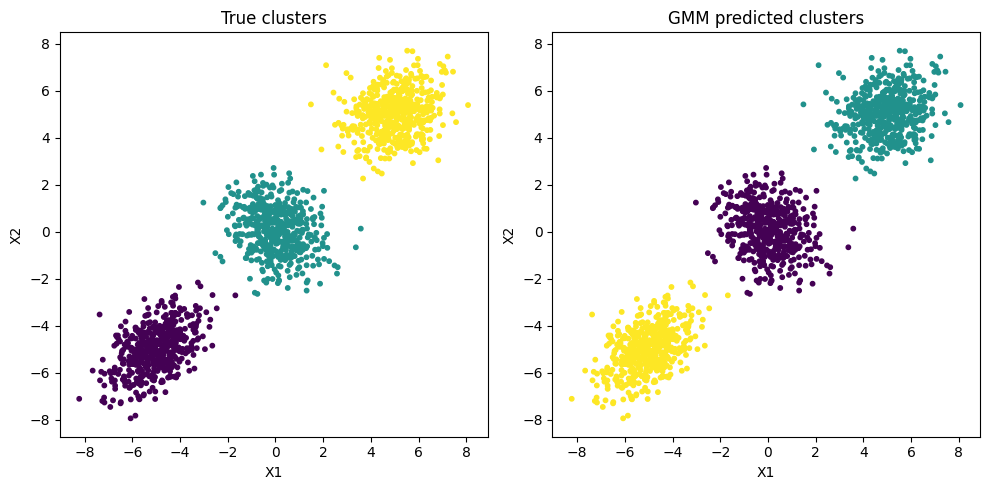

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))

# True clusters
plt.subplot(1, 2, 1)
plt.title("True clusters")
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', s=10)
plt.xlabel("X1")
plt.ylabel("X2")

# GMM predicted clusters
plt.subplot(1, 2, 2)
plt.title("GMM predicted clusters")
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=10)
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()

# **Markov Chain Text Generator - 1**

In [ ]:
!pip install nltk
!pip install spacy
!pip install markovify
!pip install -m spacy download en

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18607 sha256=e6b41559b466d5699226383916c5a9f900c37cee75ef73168cc3af1be80c4587
  Stored in directory: /root/.cache/pip/wheels/9c/20/eb/1a3fb93f3132f2f9683e4efd834800f80c53aeddf50e84ae80
Successfully built markovify

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m


In [ ]:
import spacy
import re
import markovify
import nltk
from nltk.corpus import gutenberg
import warnings
warnings.filterwarnings('ignore')
nltk.download('gutenberg')
!python -m spacy download en

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
macbeth = gutenberg.raw('shakespeare-macbeth.txt')
caesar = gutenberg.raw('shakespeare-caesar.txt')
#print first 100 characters of each
print('\nRaw:\n', hamlet[:100])
print('\nRaw:\n', macbeth[:100])
print('\nRaw:\n', caesar[:100])


Raw:
 [The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo a

Raw:
 [The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lig

Raw:
 [The Tragedie of Julius Caesar by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Fla


In [ ]:
def text_cleaner(text):
  text = re.sub(r'--', ' ', text)
  text = re.sub('[\[].*?[\]]', '', text)
  text = re.sub(r'(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b','', text)
  text = ' '.join(text.split())
  return text

In [ ]:
hamlet = re.sub(r'Chapter \d+', '', hamlet)
macbeth = re.sub(r'Chapter \d+', '', macbeth)
caesar = re.sub(r'Chapter \d+', '', caesar)
#apply cleaning function to corpus
hamlet = text_cleaner(hamlet)
caesar = text_cleaner(caesar)
macbeth = text_cleaner(macbeth)

In [ ]:
nlp = spacy.load('en_core_web_sm')

hamlet_doc = nlp(hamlet)
macbeth_doc = nlp(macbeth)
caesar_doc = nlp(caesar)

In [ ]:
hamlet_sents = ' '.join([sent.text for sent in hamlet_doc.sents if len(sent.text) > 1])
macbeth_sents = ' '.join([sent.text for sent in macbeth_doc.sents if len(sent.text) > 1])
caesar_sents = ' '.join([sent.text for sent in caesar_doc.sents if len(sent.text) > 1])
shakespeare_sents = hamlet_sents + macbeth_sents + caesar_sents

print(shakespeare_sents)

Actus Primus. Scoena Prima. Enter Barnardo and Francisco two Centinels. Barnardo. Who's there? Fran. Nay answer me: Stand & vnfold your selfe Bar. Long liue the King Fran. Barnardo? Bar. He Fran. You come most carefully vpon your houre Bar. 'Tis now strook twelue, get thee to bed Francisco Fran. For this releefe much thankes: 'Tis bitter cold, And I am sicke at heart Barn. Haue you had quiet Guard? Fran. Not a Mouse stirring Barn. Well, goodnight. If you do meet Horatio and Marcellus, the Riuals of my Watch, bid them make hast. Enter Horatio and Marcellus. Fran. I thinke I heare them. Stand: who's there? Hor. Friends to this ground Mar. And Leige-men to the Dane Fran. Giue you good night Mar. O farwel honest Soldier, who hath relieu'd you? Fra. Barnardo ha's my place: giue you goodnight. Exit Fran. Mar. Holla Barnardo Bar. Say, what is Horatio there? Hor. A peece of him Bar. Welcome Horatio, welcome good Marcellus Mar. What, ha's this thing appear'd againe to night Bar. I haue seene no

In [ ]:
generator_1 = markovify.Text(shakespeare_sents, state_size=3)

In [ ]:
for i in range(3):
  print(generator_1.make_sentence())

for i in range(3):
  print(generator_1.make_short_sentence(max_chars=100))

None
Feare him not Caesar, he's not dangerous, He is a great way growing on the South, Weighing the youthfull Season of the yeare.
What would'st thou beg Laertes, That shall not be my Oracles as well, And set me vp in hope.
I am the Sonne of a King Rosin.
If you call me Iephta my Lord, I saw nothing Clau.
Mark Antony, heere take you Caesars body: You shall not come to my bed King.


In [ ]:
class POSifiedText(markovify.Text):
   def word_split(self, sentence):
      return ['::'.join((word.orth_, word.pos_)) for word in nlp(sentence)]
   def word_join(self, words):
      sentence = ' '.join(word.split('::')[0] for word in words)
      return sentence

generator_2 = POSifiedText(shakespeare_sents, state_size=3)

In [ ]:
for i in range(5):
  print(generator_2.make_sentence())

for i in range(5):
  print(generator_2.make_short_sentence(max_chars=100))

None
None
None
None
None
I prythee , when thou see'st that Acte a - foot , Take thou what course thou wilt .
Think what now you speak  But what is your cause of greefe Bru .
Then I would you were not so .
I vrg'd you further , then you shall do to Brutus .
Fare thee well at once , and to Worthinesse Cassi .


# **Markov Chain Text Generator - 2**

In [ ]:
import random

In [ ]:
def build_markov_chain(text, order=1):
    """
    Build a Markov chain as a dictionary.
    `order` determines the number of previous words to consider (n-gram model).
    """
    words = text.split()
    chain = {}

    for i in range(len(words) - order):
        # Create the current state as a tuple of `order` words
        state = tuple(words[i:i+order])
        next_word = words[i+order]

        if state not in chain:
            chain[state] = []
        chain[state].append(next_word)

    return chain

def generate_text(chain, length=50, order=1, seed_state=None):
    """
    Generate text of a given length using the Markov chain.
    """
    if seed_state is None:
        seed_state = random.choice(list(chain.keys()))
    else:
        # Ensure the provided seed is a tuple of correct length
        if not isinstance(seed_state, tuple):
            seed_state = (seed_state,)
        if len(seed_state) != order:
            raise ValueError(f"Seed state must be of length {order}")

    state = seed_state
    output_words = list(state)

    for _ in range(length):
        next_words = chain.get(state)
        if not next_words:
            # If we reach a state that isn't in our chain, randomly choose a new state
            state = random.choice(list(chain.keys()))
            output_words.extend(state)
            continue
        next_word = random.choice(next_words)
        output_words.append(next_word)

        # Update the state for the next iteration (for order > 1, slide the window)
        state = tuple(output_words[-order:])

    return ' '.join(output_words)

sample_text = (
    "In the midst of the word he was trying to say, "
    "In the midst of his laughter and glee, "
    "He had softly and suddenly vanished away— "
    "For the Snark was a Boojum, you see. "
    "Alice was beginning to get very tired of sitting by her sister on the bank, "
    "and of having nothing to do: once or twice she had peeped into the book her sister was reading, "
    "but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice, "
    "'without pictures or conversation?' "
    "So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), "
    "whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, "
    "when suddenly a White Rabbit with pink eyes ran close by her. "
    "There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, "
    "'Oh dear! Oh dear! I shall be late!' "
    "But when the Rabbit actually took a watch out of its waistcoat-pocket, "
    "and looked at it, and then hurried on, "
    "Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, "
    "or a watch to take out of it, and burning with curiosity, she ran across the field after it."
)

# Build a Markov chain with an order of 1 (bigram model)
order = 1
chain = build_markov_chain(sample_text, order=order)

# Generate text
generated_text = generate_text(chain, length=50, order=order)
print("Generated Text:")
print(generated_text)

Generated Text:
way to say, In the midst of its waistcoat-pocket, and looked at it, 'and what is the Rabbit say to hear the Rabbit say to get very much out of sitting by her own mind (as well as she was considering in it, and then hurried on, Alice was a Boojum,
